Solution 1&2:-PLOTTING ALL THE DATA
-----------------------------------

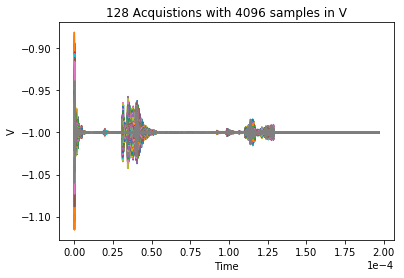

In [1]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert





f = open('LabRFdata (1).bin','rb')
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() 
x=np.arange(0,4096/20.83e6,1/20.83e6) 

LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.


for y in range(128):
    plt.plot(x,LineF[y*4096:(y+1)*4096])
    plt.title('128 Acquistions with 4096 samples in V')
    plt.xlabel('Time')
    plt.ylabel('V')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

DFT AND FREQUENCY OF THE SIGNAL
---------------------------------

The maximum is 0.600198 and it is found at index 986 which is the frequency 5.014253e+06


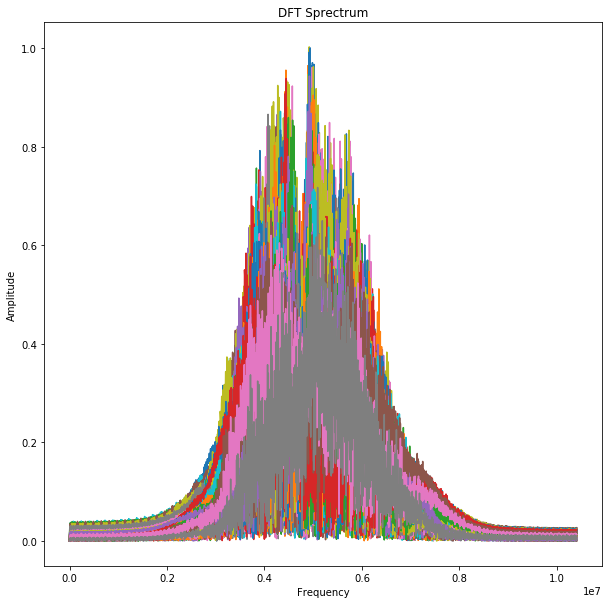

In [13]:
# %matplotlib nbagg
f=np.arange(0,20.83e6/2,20.83e6/4096)
freq = []
index = []
plt.figure(figsize=(10,10))


for z in range(128):
    
    line = LineF[(z)*4096:(z+1)*4096]
    dataF=line-np.mean(line)#eliminate dc 
    L=len(dataF) 
    Y=np.fft.fft(dataF) 
    DFT=abs(Y)
    plt.plot(f[:2048], DFT[:2048])
    plt.title('DFT Sprectrum')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    
    PyyM=DFT[:2048]
    mm=np.argmax(PyyM)
    index.append(mm)
    freq.append(f[mm])
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

RENDERING IMAGES BY RESHAPING THE ULRASOUND DATA
---------------------------------------------------

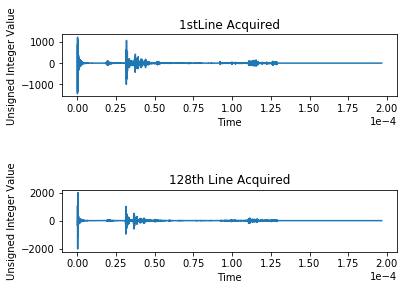

In [3]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert


f = open('LabRFdata (1).bin','rb')

L=4096
x=np.arange(0,4096/20.83e6,1/20.83e6)
Lines = np.fromfile(f,count=-1,dtype=np.int16)
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(128,4096).copy() 
TL=len(Lines)/L # 128
Y=LinesRF.astype(np.float64)
Y/=(2**15-1)
Y=Y-1.
f.close()


plt.subplots_adjust( hspace = 1.5 )
plt.subplot(211)
plt.plot(x,LinesRF[0,:])
plt.title('1stLine Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


plt.subplot(212)
plt.plot(x,LinesRF[9,:])
plt.title('128th Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

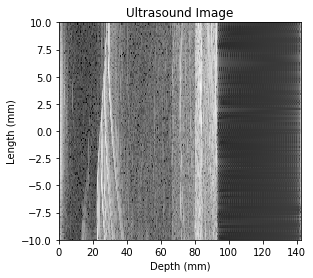

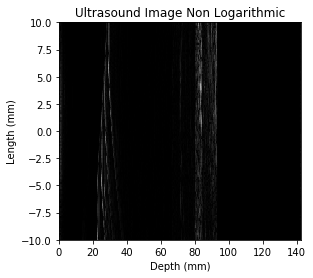

In [4]:
%matplotlib inline
#%matplotlib nbagg


#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

#the line axis
s=np.linspace(-10,10,128)
#Plotting
d=h/2*1000  #answer: why are we doing this here?

plt.figure()
plt.set_cmap(plt.gray()) 
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

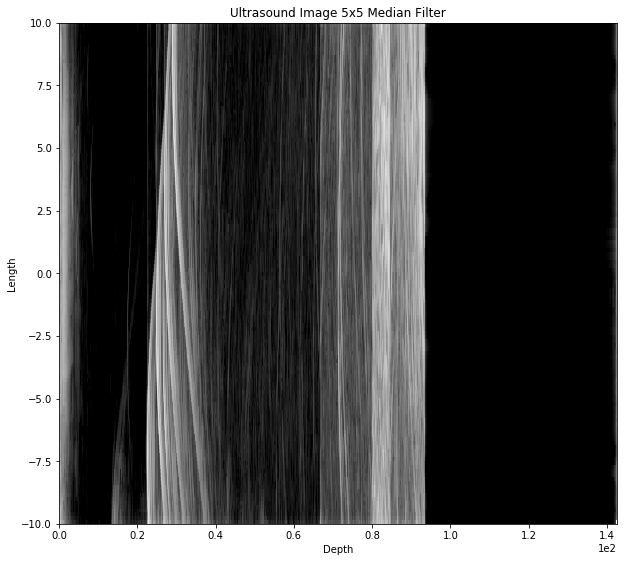

In [5]:
from scipy.signal import medfilt
%matplotlib inline
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 5x5 median filter
ImageF=medfilt(Image,5)

#Plotting
d=h/2*1000
plt.figure(figsize=(10,10))
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)

plt.title('Ultrasound Image 5x5 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Solution 3:-Bandwidth of the signal
-------------------------------------

BW=20log(x),for corner frequency we can take -3dB and +3dB around the corner frequencies. If our maximum is at V=1,-3dB where for 0.707+3dB it should be for 1.414

Solution 5 : 
-------------

In [6]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom


RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')
print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

[0, 127, 0, 119]

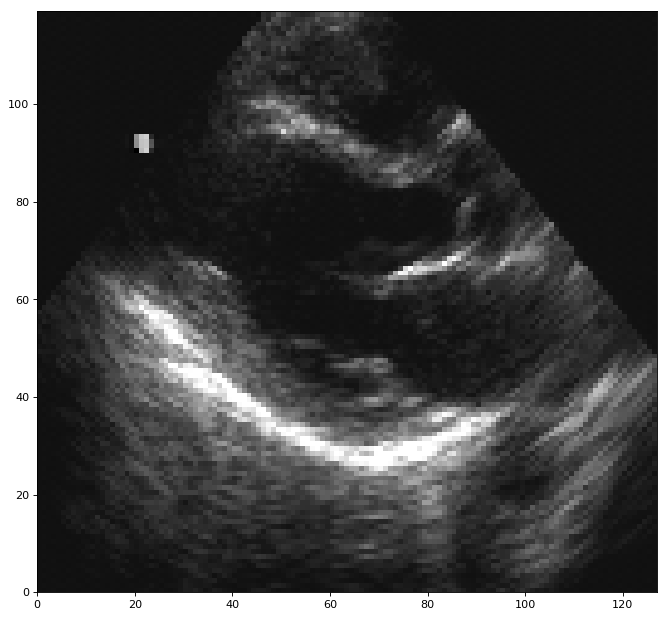

In [7]:
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array


fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(y, x, np.flipud(ArrayDicom[1,:,:]))
plt.axis([y.min(),y.max(),x.min(),x.max()])